In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 17.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 17.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


          age  preference_1  preference_2  preference_3  preference_4
cluster                                                              
0        29.2      0.633925      0.291811      0.214823      0.391713
1        36.0      0.149538      0.554865      0.832615      0.488165
2        37.0      0.866176      0.524756      0.514234      0.097672
Recommendations for User 0:
age             29.200000
preference_1     0.633925
preference_2     0.291811
preference_3     0.214823
preference_4     0.391713
Name: 0, dtype: float64


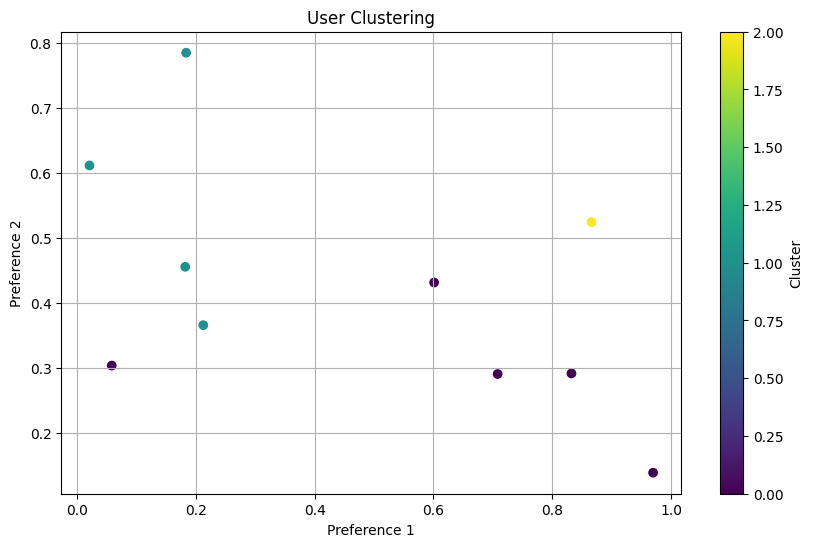

In [3]:
import numpy as np # numpy for numerical data
import pandas as pd #pandas for dataframes (structured data)

#random seed ensures you can reprdouce results
np.random.seed(42)

# generate a dataset with 10 users (rows) and attributes (columns)
#age refers to user age
# preference_1 to preference_2 represents how much the user likes certain topics

data = pd.DataFrame({
    'user_id': range(1, 11),  #create 10 user ID's from 1 to 10
    'age' : np.random.randint(18, 45, size = 10), # 10 random ages between 18 and 45
    'preference_1': np.random.rand(10),         # Random preferences between 0 and 1 for topic 1
    'preference_2': np.random.rand(10),         # Random preferences between 0 and 1 for topic 2
    'preference_3': np.random.rand(10),         # Random preferences between 0 and 1 for topic 3
    'preference_4': np.random.rand(10)          # Random preferences between 0 and 1 for topic 4
})

# Setting 'user_id' as the index, because each row should correspond to a unique user
data.set_index('user_id', inplace=True)

# Displaying the first 5 rows of the generated dataset
data.head()

# Normalizing the dataset: scaling age to be between 0 and 1, similar to the preferences
from sklearn.preprocessing import MinMaxScaler

# Selecting only the features we want to normalize (age and preferences)
features = data[['age', 'preference_1', 'preference_2', 'preference_3', 'preference_4']]

# MinMaxScaler scales features to a range between 0 and 1
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back into a DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=features.columns, index=data.index)

# Displaying the first 5 rows of the normalized dataset
scaled_data.head()

from sklearn.cluster import KMeans

# Defining the K-Means model
# Let's assume we want to group the users into 3 clusters for simplicity
kmeans = KMeans(n_clusters=3, random_state=42)

# Fitting the model on the scaled data
kmeans.fit(scaled_data)

# Predicting the cluster each user belongs to
clusters = kmeans.predict(scaled_data)

# Adding the cluster information to the original DataFrame
data['cluster'] = clusters

# Display the updated DataFrame
data[['age', 'preference_1', 'preference_2', 'preference_3', 'preference_4', 'cluster']].head()


# Calculating the average preferences for each cluster
cluster_means = data.groupby('cluster').mean()
print(cluster_means)


def recommend_items(user_data, cluster_means):
    # Get the user's cluster
    user_cluster = user_data['cluster']
    
    # Get the average preferences for the user's cluster
    recommended_preferences = cluster_means.loc[user_cluster]
    
    # Display recommendations
    return recommended_preferences

# Let's say we want to recommend items for the first user in the DataFrame
user_to_recommend = data.iloc[0]

# Get recommendations for this user
recommendations = recommend_items(user_to_recommend, cluster_means)
print(f"Recommendations for User 0:\n{recommendations}")

import matplotlib.pyplot as plt

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['preference_1'], data['preference_2'], c=data['cluster'], cmap='viridis', marker='o')
plt.title('User Clustering')
plt.xlabel('Preference 1')
plt.ylabel('Preference 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()
